# **The First Step in  Preprocessing : Attribute selection**
**This dataset** contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

 

## **Data**


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/vgsales.csv'

In [ ]:
df = pd.read_csv(dataset_path)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df[df.Year.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


## **Drop Irrelevant Attributes**


In [ ]:
dropped_list = ['Rank','Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [ ]:
for col in dropped_list:
  df = df.drop(col, axis=1)

In [ ]:
df

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01
16594,GC,2003.0,Shooter,Infogrames,0.01
16595,PS2,2008.0,Racing,Activision,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.01


## **Find null and Unkown record**

In [ ]:
df.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
df = df.replace(['Unknown'], np.nan)

In [ ]:
df.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher       261
Global_Sales      0
dtype: int64

In [ ]:
df=df.dropna(axis= 0)

In [ ]:
df.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

### **Convert Categorial Attributes for int**


In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category').cat.codes

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df

,Platform,Year,Genre,Publisher,Global_Sales
0,26,2006,10,359,82.74
1,11,1985,4,359,40.24
2,26,2008,6,359,35.82
3,26,2009,10,359,33.00
4,5,1996,7,359,31.37
...,...,...,...,...,...
16593,6,2002,4,269,0.01
16594,7,2003,8,241,0.01
16595,16,2008,6,21,0.01
16596,4,2010,5,8,0.01


In [ ]:
df.reset_index(inplace= True , drop=True)

In [ ]:
df

,Platform,Year,Genre,Publisher,Global_Sales
0,26,2006,10,359,82.74
1,11,1985,4,359,40.24
2,26,2008,6,359,35.82
3,26,2009,10,359,33.00
4,5,1996,7,359,31.37
...,...,...,...,...,...
16186,6,2002,4,269,0.01
16187,7,2003,8,241,0.01
16188,16,2008,6,21,0.01
16189,4,2010,5,8,0.01


# **Data Visualization - Before Scaling**

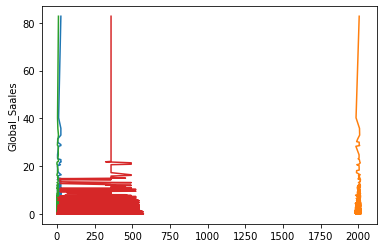

In [ ]:
import matplotlib.pyplot as plt
#line1
x1 = df['Platform']
y = df['Global_Sales']
plt.plot(x1,y,label = "line 1")
#line2
x2 = df['Year']
y = df['Global_Sales']
plt.plot(x2,y,label ="line 2")
#line3
x3 = df['Genre']
y = df['Global_Sales']
plt.plot(x3,y,label ="line 3")
#line4
x4 = df['Publisher']
y = df['Global_Sales']
plt.plot(x4,y,label ="line 4")

plt.ylabel('Global_Saales')
plt.show() 

# **Scaling**

In [ ]:
X = df.iloc[:, :-1]

In [ ]:
Y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)

In [ ]:
new_df= pd.DataFrame(scaledX)

In [ ]:
new_df

,0,1,2,3
0,0.866667,0.650,0.909091,0.625436
1,0.366667,0.125,0.363636,0.625436
2,0.866667,0.700,0.545455,0.625436
3,0.866667,0.725,0.909091,0.625436
4,0.166667,0.400,0.636364,0.625436
...,...,...,...,...
16186,0.200000,0.550,0.363636,0.468641
16187,0.233333,0.575,0.727273,0.419861
16188,0.533333,0.700,0.545455,0.036585
16189,0.133333,0.750,0.454545,0.013937


**Rename  the columns**

In [ ]:
col_list = ['Platform', 'Year','Genre','Publisher']

In [ ]:
new_df.columns=col_list

In [ ]:
new_df

,Platform,Year,Genre,Publisher
0,0.866667,0.650,0.909091,0.625436
1,0.366667,0.125,0.363636,0.625436
2,0.866667,0.700,0.545455,0.625436
3,0.866667,0.725,0.909091,0.625436
4,0.166667,0.400,0.636364,0.625436
...,...,...,...,...
16186,0.200000,0.550,0.363636,0.468641
16187,0.233333,0.575,0.727273,0.419861
16188,0.533333,0.700,0.545455,0.036585
16189,0.133333,0.750,0.454545,0.013937


**we added the target columns (Global_Sales) to the new_df**

In [ ]:
new_df['Global_Sales']=Y
new_df

,Platform,Year,Genre,Publisher,Global_Sales
0,0.866667,0.650,0.909091,0.625436,82.74
1,0.366667,0.125,0.363636,0.625436,40.24
2,0.866667,0.700,0.545455,0.625436,35.82
3,0.866667,0.725,0.909091,0.625436,33.00
4,0.166667,0.400,0.636364,0.625436,31.37
...,...,...,...,...,...
16186,0.200000,0.550,0.363636,0.468641,0.01
16187,0.233333,0.575,0.727273,0.419861,0.01
16188,0.533333,0.700,0.545455,0.036585,0.01
16189,0.133333,0.750,0.454545,0.013937,0.01


In [ ]:
new_df.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

# **Data Visualization - After Scaling**

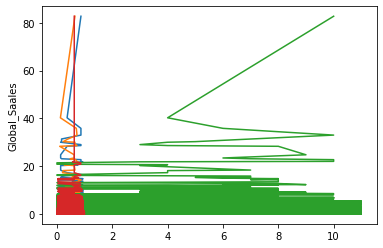

In [ ]:
import matplotlib.pyplot as plt
#line1
x1 = new_df['Platform']
y = new_df['Global_Sales']
plt.plot(x1,y,label ="line 1")
#line2
x2 = new_df['Year']
y = new_df['Global_Sales']
plt.plot(x2,y,label ="line 2")
#line3
x4 = new_df['Genre']
y4 = new_df['Global_Sales']
plt.plot(x3,y,label ="line 3")
#line4
x4 = new_df['Publisher']
y = new_df['Global_Sales']
plt.plot(x4,y,label ="line 4")

plt.ylabel('Global_Saales')
plt.show() 

**Split into X and Y**

In [ ]:
X = new_df[[ 'Year', 'Platform', 'Genre', 'Publisher']]
Y = new_df['Global_Sales']

# **Modeling**


**split into training and test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

**init model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**train**

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**test model**


In [ ]:
y_pred = model.predict(x_test)

**evaluate model**

In [ ]:
from sklearn import metrics
import numpy as np
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.4529668585236766
